In [101]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [102]:
import numpy as np 
import pandas as pd
import re
from konlpy.tag import Okt
from tqdm import tqdm

In [103]:
data = pd.read_table('./ratings.txt')

In [104]:
data['document'].nunique()

194543

In [105]:
#중복 제거
data.drop_duplicates(subset=['document'], inplace=True)

<AxesSubplot:>

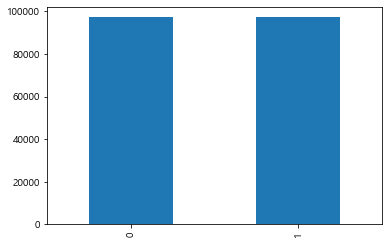

In [106]:
data['label'].value_counts().plot(kind='bar')

In [107]:
data.groupby('label').size().reset_index(name=('count'))

,label,count
0,0,97277
1,1,97267


In [108]:
data.isnull().values.any()

True

In [109]:
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [110]:
data.loc[data.document.isnull()]

,id,document,label
46471,6369843,NaN,1


In [111]:
data.dropna(inplace=True)

In [112]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [113]:
len(data)

194543

In [114]:
#영어,특수문자 제거, 한글만을 남기게 정규식 사용
data['document'] = data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

C:\Users\user\AppData\Local\Temp\ipykernel_7160\1396448148.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [115]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰 레 기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [116]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [117]:
data['document'].replace('',np.nan, inplace=True)

In [118]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.document, data.label, random_state=1234)

In [120]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다']


In [121]:
okt = Okt()

In [122]:
okt.morphs('오늘 날씨가 추워서 기분이 좋지않다', stem=True)

['오늘', '날씨', '가', '춥다', '기분', '이', '좋다', '않다']

In [124]:
x_train = x_train[:10000]
x_test = x_test[:10000]
y_train = y_train[:10000]
y_test = y_test[:10000]

In [125]:
train_x = []

for s in tqdm(x_train):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    train_x.append(temp_x)

100%|██████████| 10000/10000 [00:16<00:00, 624.04it/s]


In [126]:
test_x = []

for s in tqdm(x_train):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    test_x.append(temp_x)

100%|██████████| 10000/10000 [00:23<00:00, 426.10it/s]


### word2vec 적용

In [128]:
from gensim.models import Word2Vec

In [132]:
w2v = Word2Vec(train_x, vector_size=300, window=3, min_count=5) #vector_size= 텍스트에 대해 몇차원으로 변환해주는 변수 (한글 =50~300차원이 좋다)


In [133]:
word_vectors = w2v.wv

In [141]:
vocabs = word_vectors.key_to_index

In [142]:
vocabs

{'영화': 0,
 '보다': 1,
 '을': 2,
 '없다': 3,
 '있다': 4,
 '이다': 5,
 '좋다': 6,
 '너무': 7,
 '다': 8,
 '정말': 9,
 '적': 10,
 '되다': 11,
 '만': 12,
 '진짜': 13,
 '재밌다': 14,
 '같다': 15,
 '아니다': 16,
 '점': 17,
 '않다': 18,
 '로': 19,
 '연기': 20,
 '것': 21,
 '에서': 22,
 '평점': 23,
 '만들다': 24,
 '나오다': 25,
 '그': 26,
 '내': 27,
 '스토리': 28,
 '나': 29,
 '최고': 30,
 '못': 31,
 '인': 32,
 '안': 33,
 '생각': 34,
 '게': 35,
 '왜': 36,
 '감동': 37,
 '고': 38,
 '드라마': 39,
 '보고': 40,
 '말': 41,
 '사람': 42,
 '아깝다': 43,
 '이렇다': 44,
 '때': 45,
 '배우': 46,
 '거': 47,
 '아': 48,
 '중': 49,
 'ㅋㅋ': 50,
 '감독': 51,
 '수': 52,
 '까지': 53,
 '내용': 54,
 '시간': 55,
 '그냥': 56,
 '요': 57,
 '더': 58,
 '뭐': 59,
 '주다': 60,
 '하고': 61,
 '가다': 62,
 '재미': 63,
 '자다': 64,
 '재미없다': 65,
 '쓰레기': 66,
 '들다': 67,
 '싶다': 68,
 '재미있다': 69,
 '지루하다': 70,
 '작품': 71,
 '사랑': 72,
 'ㅋ': 73,
 '네': 74,
 '하나': 75,
 '볼': 76,
 '알다': 77,
 '그렇다': 78,
 '처음': 79,
 '지': 80,
 '모르다': 81,
 '완전': 82,
 'ㅋㅋㅋ': 83,
 '정도': 84,
 '안되다': 85,
 '이건': 86,
 '다시': 87,
 '마지막': 88,
 '걸': 89,
 '임': 90,
 '나다': 91,
 '주인공': 9

In [144]:
word_vectors_list =[word_vectors[v] for v in vocabs]

In [145]:
print(word_vectors_list[:1])

[array([ 0.01370581,  0.3212177 , -0.02713719,  0.21897395, -0.02308831,
       -0.23793253,  0.13510993,  0.5944346 ,  0.09400882, -0.14526936,
        0.14015177, -0.30503505,  0.042162  , -0.02821291, -0.19357693,
       -0.28117564,  0.09619983, -0.05367788,  0.1281928 , -0.1313717 ,
       -0.16883245, -0.08516304,  0.22943853,  0.06535878,  0.22919358,
        0.07905169, -0.30683467,  0.03626047, -0.14418977, -0.182577  ,
        0.06699216, -0.11787911,  0.05952772, -0.03418445, -0.00884419,
        0.13583487,  0.09255058, -0.28270867,  0.06598908, -0.03304175,
       -0.04837876,  0.03019455,  0.03303807, -0.23653752,  0.12336852,
        0.2095696 ,  0.05530983,  0.11417405, -0.06281349,  0.1616099 ,
        0.09737303, -0.01607275, -0.14956623,  0.08283284, -0.09186435,
        0.18930958,  0.12233128, -0.03181431, -0.02209492, -0.10247698,
       -0.14682105, -0.08513953, -0.06478926,  0.08712196, -0.03098176,
        0.06747453,  0.01316692,  0.07279626, -0.18494552, -0.1

In [148]:
# 유사한 단어 뽑아내기
w2v.wv.most_similar('관객')

[('우리', 0.9997755289077759),
 ('되어다', 0.9997645020484924),
 ('식', 0.9997615814208984),
 ('이라는', 0.9997540712356567),
 ('그리고', 0.9997524619102478),
 ('살다', 0.9997517466545105),
 ('여자', 0.9997516870498657),
 ('대다', 0.9997515082359314),
 ('에게', 0.9997491240501404),
 ('이란', 0.9997456073760986)]

In [149]:
# 학습된 모델 저장
w2v.save('w2v.bin')

In [150]:
# 모델 불러오기
saved_w2v = Word2Vec.load('w2v.bin')